In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from typing import List, Dict, Tuple

In [3]:
def get_interordinal_scale(
    data: pd.DataFrame,
    feature_name: str,
    thresholds: List[float],
) -> pd.DataFrame:
    for threshold in thresholds:
        data[f'{feature_name}_ge_{threshold}'] = (data[feature_name] >= threshold).astype(int)
        data[f'{feature_name}_le_{threshold}'] = (data[feature_name] <= threshold).astype(int)
        # data = data.drop(columns=[feature_name])
    return data


In [4]:
data = pd.read_csv('diabetes/diabetes_dataset.csv')

In [5]:
data = data.rename(columns={
    "Pregnancies": "pregnancies",
    "Glucose": "glucose",
    "BloodPressure": "blood_pressure",
    "SkinThickness": "skin_thickness",
    "Insulin": "insulin",
    "BMI": "bmi",
    "DiabetesPedigreeFunction": "diabetes_pedigree_func",
    "Age": "age",
    "Outcome": "outcome",
})

In [6]:
data.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
data.isna().sum()

pregnancies               0
glucose                   0
blood_pressure            0
skin_thickness            0
insulin                   0
bmi                       0
diabetes_pedigree_func    0
age                       0
outcome                   0
dtype: int64

In [8]:
data.shape

(768, 9)

In [9]:
data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(columns=['outcome'])
y = data[['outcome']]

X.shape, y.shape

((768, 8), (768, 1))

<Axes: ylabel='Frequency'>

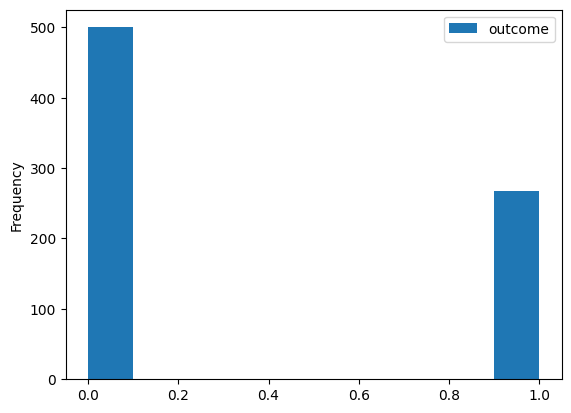

In [13]:
y.plot(kind='hist')

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((576, 8), (576, 1), (192, 8), (192, 1))

In [14]:
data.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_func', 'age', 'outcome'],
      dtype='object')

## Processing of **pregnancies** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\67426492.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


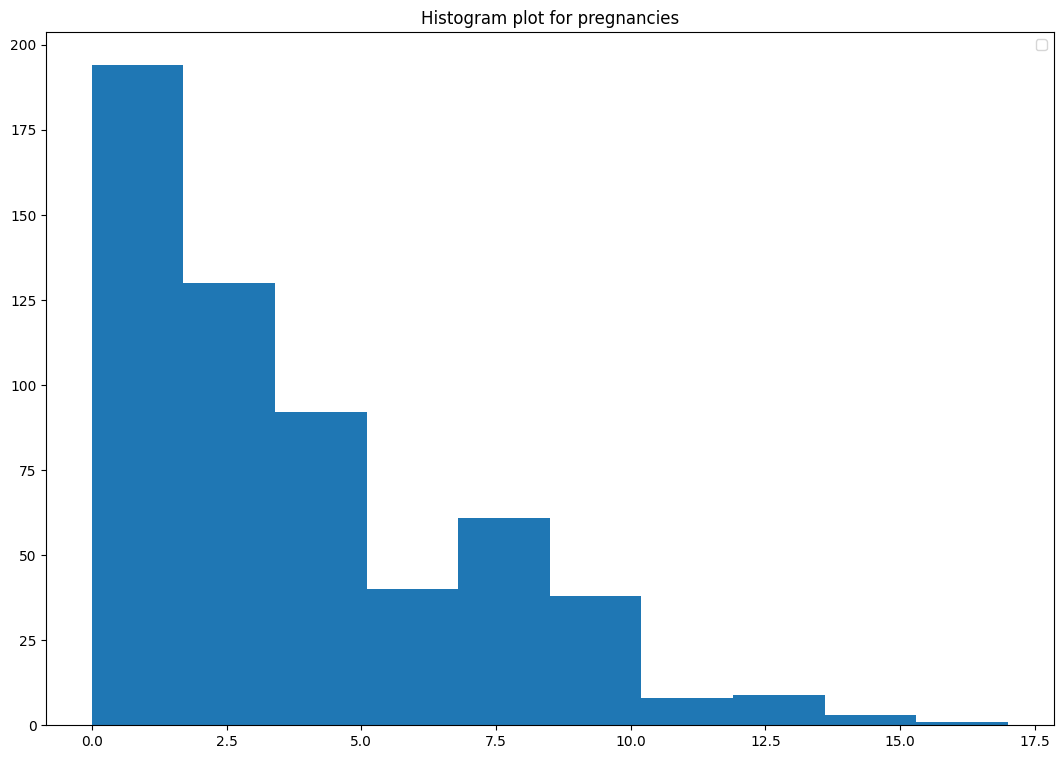

In [15]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['pregnancies'])
plt.title(f'Histogram plot for pregnancies')
plt.legend()
plt.show();

In [16]:
X_train['pregnancies'].describe()

count    576.000000
mean       3.741319
std        3.305452
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64

In [17]:
X_train[['pregnancies']].quantile([0.8, 0.9])

,pregnancies
0.8,7.0
0.9,9.0


In [18]:
X_train.shape

(576, 8)

In [19]:
pregnancies_thresholds = [1, 3, 7, 9]
X_train_binarized = get_interordinal_scale(X_train, 'pregnancies', pregnancies_thresholds)

In [20]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,pregnancies_ge_3,pregnancies_le_3,pregnancies_ge_7,pregnancies_le_7,pregnancies_ge_9,pregnancies_le_9
357,13,129,0,30,0,39.9,0.569,44,1,0,1,0,1,0,1,0
73,4,129,86,20,270,35.1,0.231,23,1,0,1,0,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,1,1,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,1,0,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,1,0,1,0,1,0
435,0,141,0,0,0,42.4,0.205,29,0,1,0,1,0,1,0,1


## Processing of **glucose** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\3178096929.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


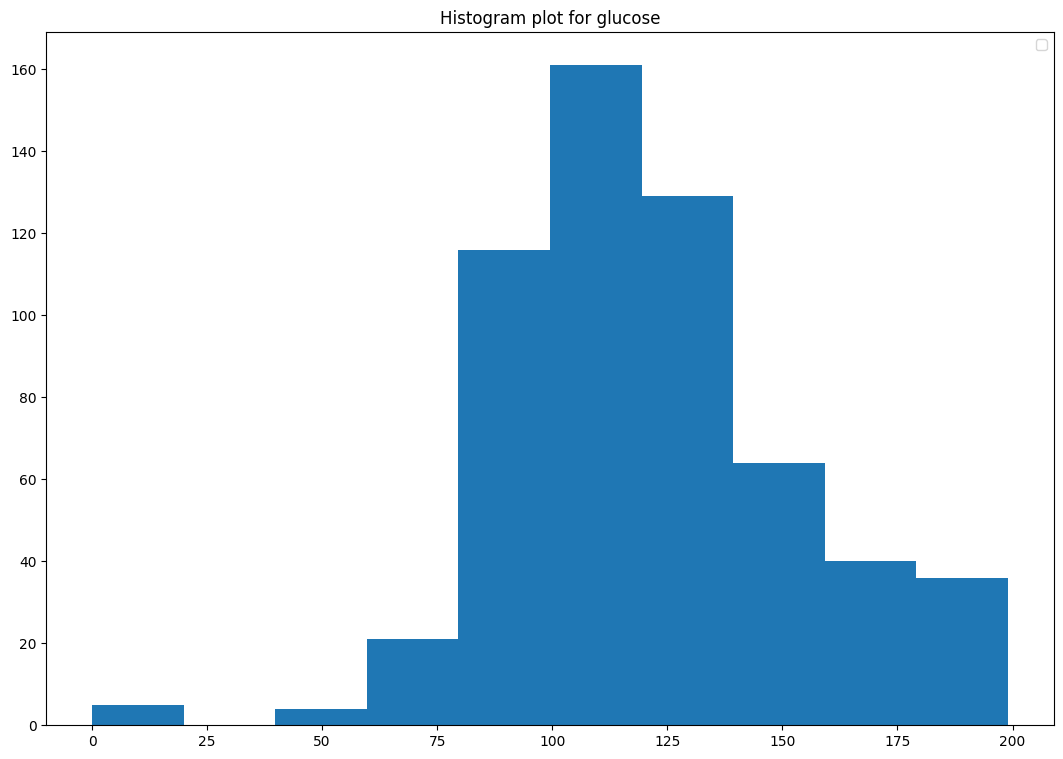

In [21]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['glucose'])
plt.title(f'Histogram plot for glucose')
plt.legend()
plt.show();

In [22]:
X_train['glucose'].describe()

count    576.000000
mean     120.659722
std       32.133182
min        0.000000
25%       99.000000
50%      117.000000
75%      138.250000
max      199.000000
Name: glucose, dtype: float64

In [23]:
X_train[['glucose']].quantile([0.05, 0.8, 0.9])

,glucose
0.05,79.0
0.80,145.0
0.90,167.5


In [24]:
glucose_thresholds = [79, 99, 117, 145, 168]
X_train_binarized = get_interordinal_scale(X_train_binarized, 'glucose', glucose_thresholds)

In [25]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,glucose_ge_79,glucose_le_79,glucose_ge_99,glucose_le_99,glucose_ge_117,glucose_le_117,glucose_ge_145,glucose_le_145,glucose_ge_168,glucose_le_168
357,13,129,0,30,0,39.9,0.569,44,1,0,...,1,0,1,0,1,0,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,1,0,1,0,1,0,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,0,1,0,1,0,1,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,0,1,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,1,0,1,0,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,1,0,1,0,0,1,0,1,0,1
435,0,141,0,0,0,42.4,0.205,29,0,1,...,1,0,1,0,1,0,0,1,0,1


## Processing of **blood_pressure** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\1223690346.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


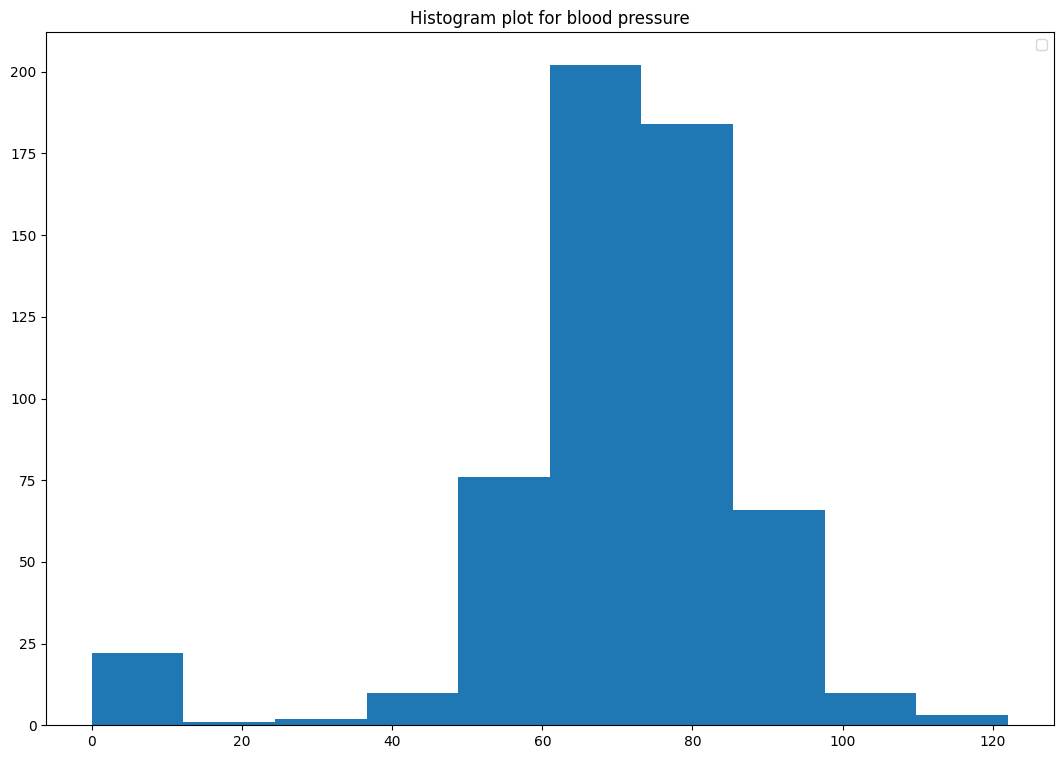

In [26]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['blood_pressure'])
plt.title(f'Histogram plot for blood pressure')
plt.legend()
plt.show();

In [27]:
X_train['blood_pressure'].describe()

count    576.000000
mean      69.505208
std       18.399810
min        0.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: blood_pressure, dtype: float64

In [28]:
X_train[['blood_pressure']].quantile([0.05, 0.8, 0.9])

,blood_pressure
0.05,44.0
0.80,82.0
0.90,88.0


In [29]:
blood_pressure_thresholds = [20, 64, 72, 82, 88] # took 20 as the boundary value for the part of distribution with low values
X_train_binarized = get_interordinal_scale(X_train_binarized, 'blood_pressure', blood_pressure_thresholds)

In [30]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,blood_pressure_ge_20,blood_pressure_le_20,blood_pressure_ge_64,blood_pressure_le_64,blood_pressure_ge_72,blood_pressure_le_72,blood_pressure_ge_82,blood_pressure_le_82,blood_pressure_ge_88,blood_pressure_le_88
357,13,129,0,30,0,39.9,0.569,44,1,0,...,0,1,0,1,0,1,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,1,0,1,0,1,0,1,0,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,1,0,1,0,1,0,1,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,1,0,1,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,1,1,0,1,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,1,0,1,0,1,0,1,0
270,10,101,86,37,0,45.6,1.136,38,1,0,...,1,0,1,0,1,0,1,0,0,1
435,0,141,0,0,0,42.4,0.205,29,0,1,...,0,1,0,1,0,1,0,1,0,1


## Processing of **skin_thickness** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\2513780159.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


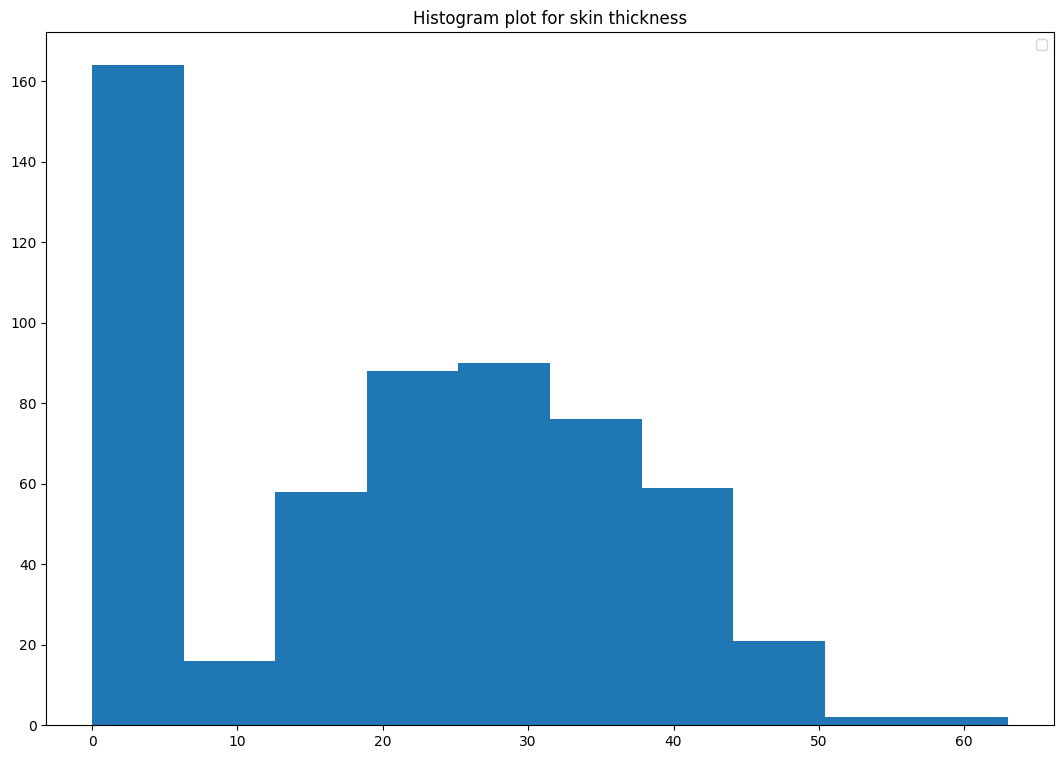

In [31]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['skin_thickness'])
plt.title(f'Histogram plot for skin thickness')
plt.legend()
plt.show();

In [32]:
X_train['skin_thickness'].describe()

count    576.000000
mean      20.494792
std       15.424655
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       63.000000
Name: skin_thickness, dtype: float64

In [33]:
X_train[['skin_thickness']].quantile([0.4, 0.8, 0.9])

,skin_thickness
0.4,18.0
0.8,35.0
0.9,40.0


In [34]:
skin_thickness_thresholds = [10, 23, 32, 40] # took 10 to separate the low values
X_train_binarized = get_interordinal_scale(X_train_binarized, 'skin_thickness', skin_thickness_thresholds)

In [35]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,blood_pressure_ge_88,blood_pressure_le_88,skin_thickness_ge_10,skin_thickness_le_10,skin_thickness_ge_23,skin_thickness_le_23,skin_thickness_ge_32,skin_thickness_le_32,skin_thickness_ge_40,skin_thickness_le_40
357,13,129,0,30,0,39.9,0.569,44,1,0,...,0,1,1,0,1,0,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,0,1,1,0,0,1,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,0,1,1,0,1,0,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,0,1,1,0,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,0,1,1,0,1,0,1,0,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,0,1,1,0,1,0,1,0,0,1
435,0,141,0,0,0,42.4,0.205,29,0,1,...,0,1,0,1,0,1,0,1,0,1


## Processing of **insulin** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\3594473942.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


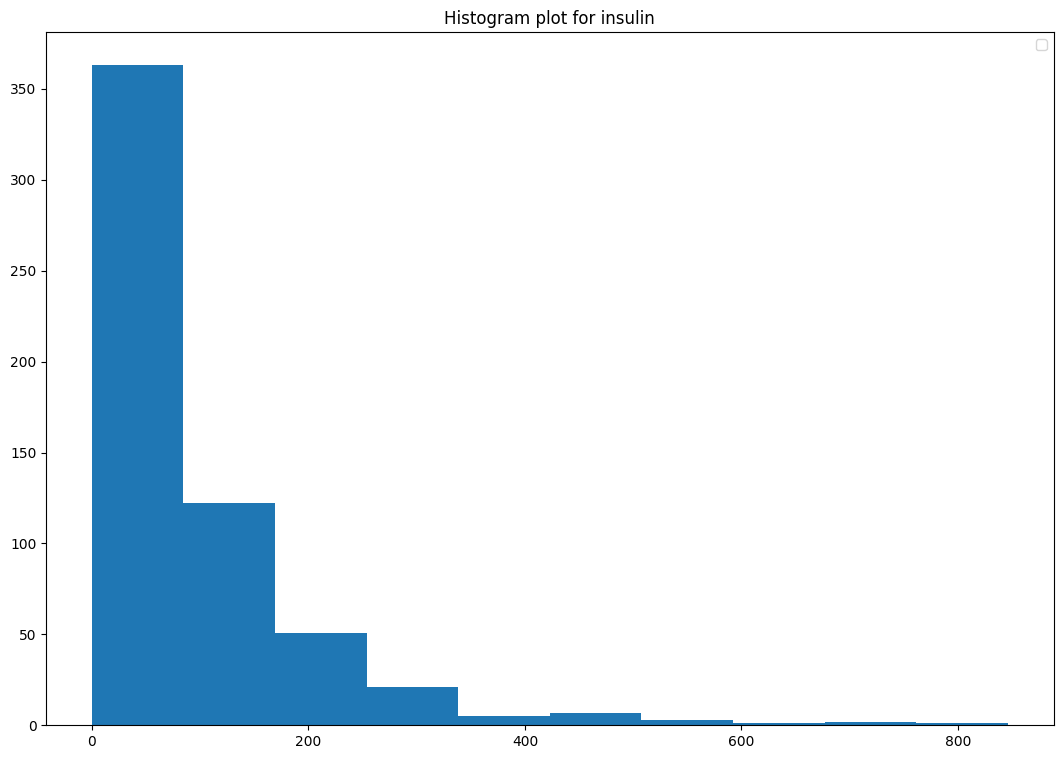

In [36]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['insulin'])
plt.title(f'Histogram plot for insulin')
plt.legend()
plt.show();

In [37]:
X_train['insulin'].describe()

count    576.000000
mean      80.362847
std      116.223541
min        0.000000
25%        0.000000
50%       37.000000
75%      127.500000
max      846.000000
Name: insulin, dtype: float64

In [38]:
X_train[['insulin']].quantile([0.48, 0.5, 0.6, 0.7, 0.8, 0.9])

,insulin
0.48,14.0
0.50,37.0
0.60,75.0
0.70,107.0
0.80,148.0
0.90,210.0


In [39]:
insulin_thresholds = [37, 75, 107, 127, 148, 210]
X_train_binarized = get_interordinal_scale(X_train_binarized, 'insulin', insulin_thresholds)

In [40]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,insulin_ge_75,insulin_le_75,insulin_ge_107,insulin_le_107,insulin_ge_127,insulin_le_127,insulin_ge_148,insulin_le_148,insulin_ge_210,insulin_le_210
357,13,129,0,30,0,39.9,0.569,44,1,0,...,0,1,0,1,0,1,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,1,0,1,0,1,0,1,0,1,0
352,3,61,82,28,0,34.4,0.243,46,1,0,...,0,1,0,1,0,1,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,0,1,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,1,0,1,0,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,0,1,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,0,1,0,1,0,1,0,1,0,1
435,0,141,0,0,0,42.4,0.205,29,0,1,...,0,1,0,1,0,1,0,1,0,1


## Processing of **bmi** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\1168305003.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


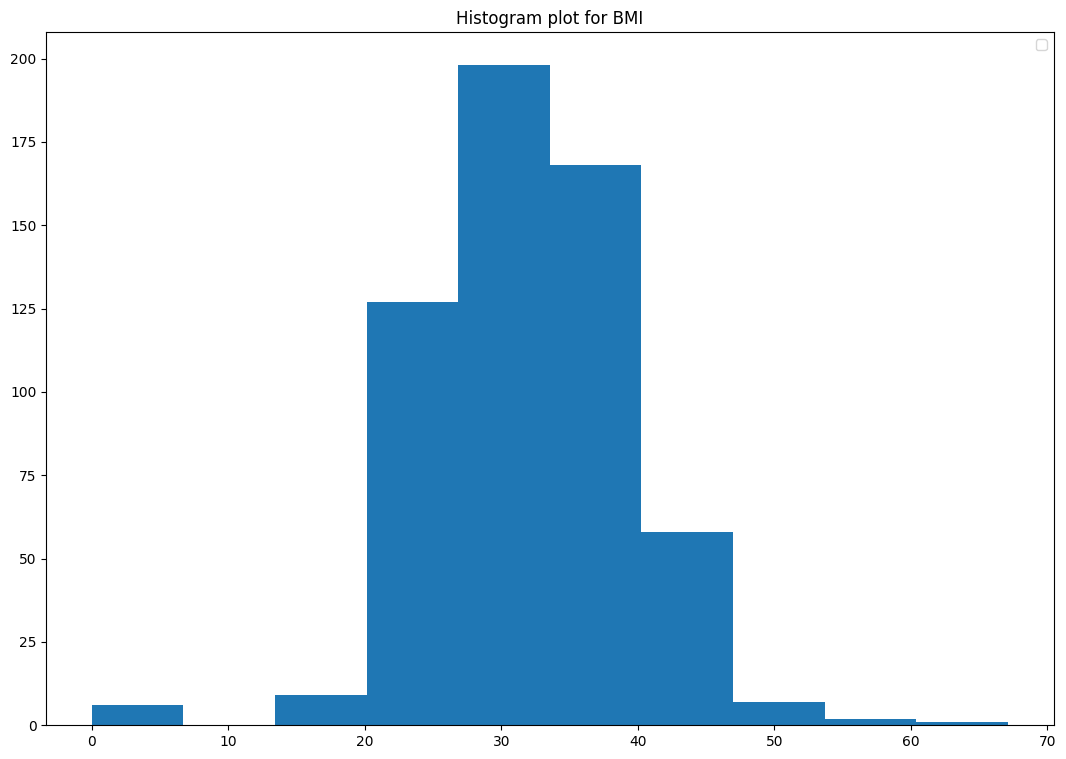

In [41]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['bmi'])
plt.title(f'Histogram plot for BMI')
plt.legend()
plt.show();

In [42]:
X_train['bmi'].describe()

count    576.000000
mean      31.981771
std        7.622203
min        0.000000
25%       27.000000
50%       32.000000
75%       36.325000
max       67.100000
Name: bmi, dtype: float64

In [43]:
X_train[['bmi']].quantile([0.05, 0.1, 0.8, 0.9])

,bmi
0.05,21.80
0.10,23.70
0.80,37.80
0.90,41.25


In [ ]:
bmi_thresholds = [21, 27, 32, 36, 41]
X_train_binarized = get_interordinal_scale(X_train_binarized, 'bmi', bmi_thresholds)

In [45]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,bmi_ge_21,bmi_le_21,bmi_ge_27,bmi_le_27,bmi_ge_32,bmi_le_32,bmi_ge_36,bmi_le_36,bmi_ge_41,bmi_le_41
357,13,129,0,30,0,39.9,0.569,44,1,0,...,1,0,1,0,1,0,1,0,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,1,0,1,0,1,0,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,1,0,1,0,1,0,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,1,0,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,1,0,0,1,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,1,0,1,0,1,0,1,0,1,0
435,0,141,0,0,0,42.4,0.205,29,0,1,...,1,0,1,0,1,0,1,0,1,0


## Processing of **diabetes_pedigree_func** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\735815723.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


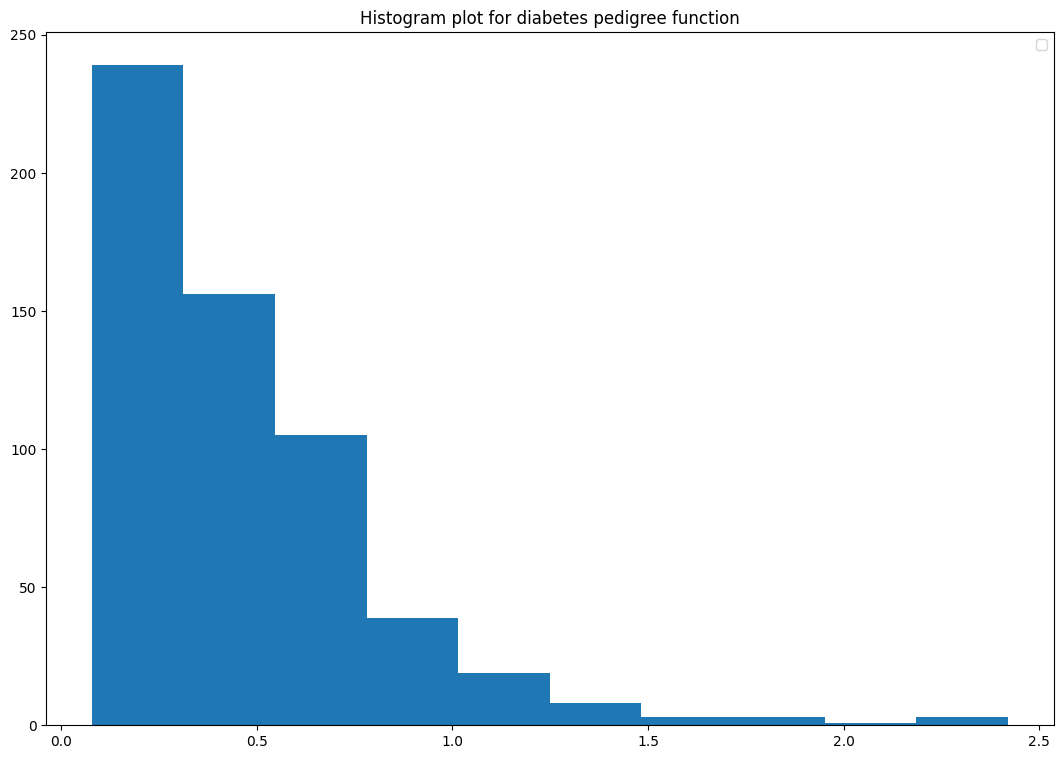

In [46]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['diabetes_pedigree_func'])
plt.title(f'Histogram plot for diabetes pedigree function')
plt.legend()
plt.show();

In [47]:
X_train['diabetes_pedigree_func'].describe()

count    576.000000
mean       0.468618
std        0.339325
min        0.078000
25%        0.240000
50%        0.372500
75%        0.612250
max        2.420000
Name: diabetes_pedigree_func, dtype: float64

In [48]:
X_train[['diabetes_pedigree_func']].quantile([0.1, 0.2, 0.8, 0.9])

,diabetes_pedigree_func
0.1,0.1615
0.2,0.2190
0.8,0.6740
0.9,0.8550


In [49]:
diabetes_pedigree_func_thresholds = [0.16, 0.24, 0.37, 0.61, 0.88]
X_train_binarized = get_interordinal_scale(X_train_binarized, 'diabetes_pedigree_func', diabetes_pedigree_func_thresholds)

In [50]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,diabetes_pedigree_func_ge_0.16,diabetes_pedigree_func_le_0.16,diabetes_pedigree_func_ge_0.24,diabetes_pedigree_func_le_0.24,diabetes_pedigree_func_ge_0.37,diabetes_pedigree_func_le_0.37,diabetes_pedigree_func_ge_0.61,diabetes_pedigree_func_le_0.61,diabetes_pedigree_func_ge_0.88,diabetes_pedigree_func_le_0.88
357,13,129,0,30,0,39.9,0.569,44,1,0,...,1,0,1,0,1,0,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,1,0,0,1,0,1,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,1,0,1,0,0,1,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,1,0,1,0,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,1,0,1,0,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,1,0,1,0,1,0,1,0,1,0
435,0,141,0,0,0,42.4,0.205,29,0,1,...,1,0,0,1,0,1,0,1,0,1


## Processing of **age** columns

C:\Users\yunes\AppData\Local\Temp\ipykernel_10728\2044540940.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


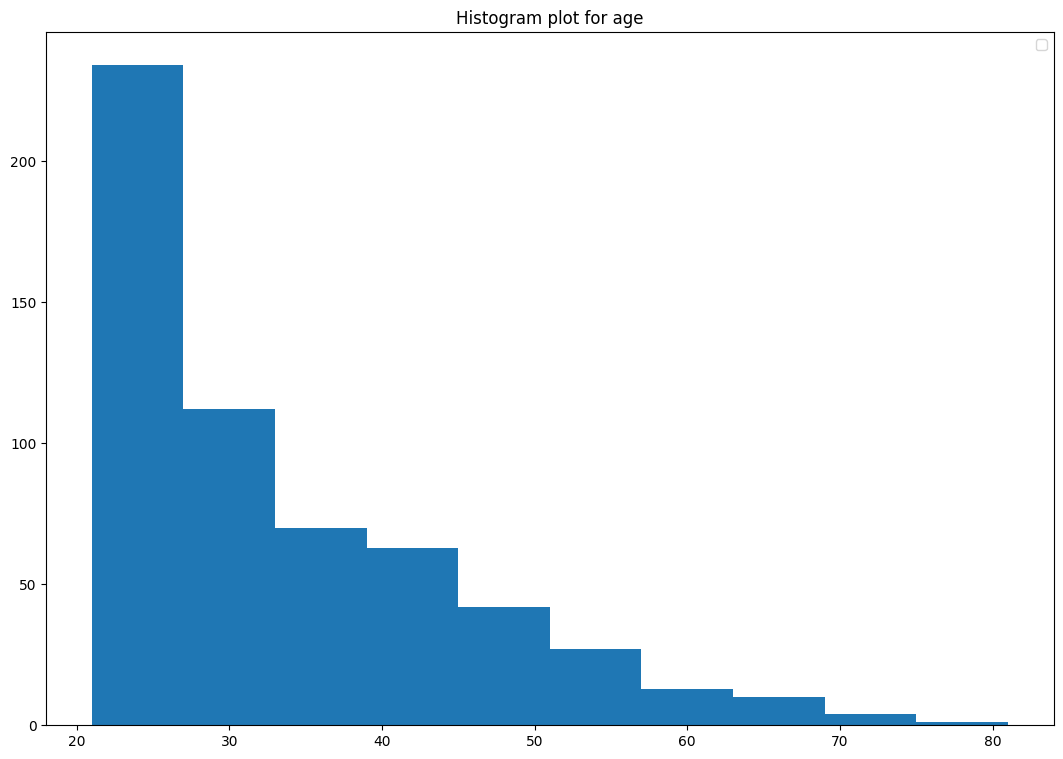

In [51]:
plt.figure(figsize=(13, 9))
plt.hist(X_train['age'])
plt.title(f'Histogram plot for age')
plt.legend()
plt.show();

In [52]:
X_train['age'].describe()

count    576.000000
mean      32.921875
std       11.507539
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: age, dtype: float64

In [53]:
X_train[['age']].quantile([0.1, 0.2, 0.8, 0.9, 0.95])

,age
0.10,22.0
0.20,23.0
0.80,42.0
0.90,50.0
0.95,56.0


In [54]:
age_thresholds = [24, 29, 40, 50, 60]
X_train_binarized = get_interordinal_scale(X_train_binarized, 'age', age_thresholds)

In [55]:
X_train_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,age_ge_24,age_le_24,age_ge_29,age_le_29,age_ge_40,age_le_40,age_ge_50,age_le_50,age_ge_60,age_le_60
357,13,129,0,30,0,39.9,0.569,44,1,0,...,1,0,1,0,1,0,0,1,0,1
73,4,129,86,20,270,35.1,0.231,23,1,0,...,0,1,0,1,0,1,0,1,0,1
352,3,61,82,28,0,34.4,0.243,46,1,0,...,1,0,1,0,1,0,0,1,0,1
497,2,81,72,15,76,30.1,0.547,25,1,0,...,1,0,0,1,0,1,0,1,0,1
145,0,102,75,23,0,0.0,0.572,21,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,1,0,...,1,0,0,1,0,1,0,1,0,1
106,1,96,122,0,0,22.4,0.207,27,1,1,...,1,0,0,1,0,1,0,1,0,1
270,10,101,86,37,0,45.6,1.136,38,1,0,...,1,0,1,0,0,1,0,1,0,1
435,0,141,0,0,0,42.4,0.205,29,0,1,...,1,0,1,1,0,1,0,1,0,1


In [56]:
feat_thresholds = {
    'pregnancies': pregnancies_thresholds,
    'glucose': glucose_thresholds,
    'blood_pressure': blood_pressure_thresholds,
    'skin_thickness': skin_thickness_thresholds,
    'insulin': insulin_thresholds,
    'bmi': bmi_thresholds,
    'diabetes_pedigree_func': diabetes_pedigree_func_thresholds,
    'age': age_thresholds,
}

In [57]:
def binarize_data(
    data: pd.DataFrame,
    feat_thresholds: Dict,
) -> pd.DataFrame:
    columns = list(data.columns)

    data_binarized = data.copy()

    for feature in feat_thresholds:
        data_binarized = get_interordinal_scale(data_binarized, feature, feat_thresholds[feature])
    
    return data_binarized 

In [58]:
X_val_binarized = binarize_data(X_val, feat_thresholds)

In [59]:
X_val_binarized

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_func,age,pregnancies_ge_1,pregnancies_le_1,...,age_ge_24,age_le_24,age_ge_29,age_le_29,age_ge_40,age_le_40,age_ge_50,age_le_50,age_ge_60,age_le_60
668,6,98,58,33,190,34.0,0.430,43,1,0,...,1,0,1,0,1,0,0,1,0,1
324,2,112,75,32,0,35.7,0.148,21,1,0,...,0,1,0,1,0,1,0,1,0,1
624,2,108,64,0,0,30.8,0.158,21,1,0,...,0,1,0,1,0,1,0,1,0,1
690,8,107,80,0,0,24.6,0.856,34,1,0,...,1,0,1,0,0,1,0,1,0,1
473,7,136,90,0,0,29.9,0.210,50,1,0,...,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,1,84,64,23,115,36.9,0.471,28,1,1,...,1,0,0,1,0,1,0,1,0,1
319,6,194,78,0,0,23.5,0.129,59,1,0,...,1,0,1,0,1,0,1,0,0,1
594,6,123,72,45,230,33.6,0.733,34,1,0,...,1,0,1,0,0,1,0,1,0,1
6,3,78,50,32,88,31.0,0.248,26,1,0,...,1,0,0,1,0,1,0,1,0,1


In [60]:
X_val_binarized.shape

(192, 86)

In [61]:
X_train_binarized_cleaned = X_train_binarized.drop(columns=['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi',
                                                            'diabetes_pedigree_func', 'age'])

In [62]:
X_val_binarized_cleaned = X_val_binarized.drop(columns=['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi',
                                                            'diabetes_pedigree_func', 'age'])

In [63]:
X_train_binarized_cleaned.shape, X_val_binarized_cleaned.shape 

((576, 78), (192, 78))

In [ ]:
X_train_binarized_cleaned.to_parquet('X_train_binarized.parquet')
X_val_binarized_cleaned.to_parquet('X_val_binarized.parquet')

In [100]:
y_train.to_parquet('y_train.parquet')
y_val.to_parquet('y_val.parquet')

## Baseline models

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier

In [65]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [66]:
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
y_pred_log_reg = log_reg_clf.predict(X_val_binarized_cleaned)

In [68]:
print(classification_report(y_val, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       123
           1       0.62      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [69]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_log_reg).ravel()
tn, fp, fn, tp

(96, 27, 25, 44)

In [70]:
svc_clf = SVC()
svc_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [71]:
y_pred_svc = svc_clf.predict(X_val_binarized_cleaned)

In [72]:
print(classification_report(y_val, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.62      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



In [73]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_svc).ravel()
tn, fp, fn, tp

(100, 23, 26, 43)

In [74]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [75]:
y_pred_rf = rf_clf.predict(X_val_binarized_cleaned)

In [76]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.64      0.65      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.74      0.75       192



In [77]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_rf).ravel()
tn, fp, fn, tp

(98, 25, 24, 45)

In [78]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [79]:
y_pred_gb = gb_clf.predict(X_val_binarized_cleaned)

In [80]:
print(classification_report(y_val, y_pred_gb))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       123
           1       0.59      0.68      0.63        69

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.71      0.72       192



In [81]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_gb).ravel()
tn, fp, fn, tp

(90, 33, 22, 47)

In [82]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_binarized_cleaned, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred_xgb = xgb_clf.predict(X_val_binarized_cleaned)

In [84]:
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       123
           1       0.59      0.64      0.62        69

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.72       192



In [85]:
from catboost import CatBoostClassifier

In [86]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train_binarized_cleaned, y_train)

Learning rate set to 0.00814
0:	learn: 0.6886338	total: 171ms	remaining: 2m 51s
1:	learn: 0.6843739	total: 176ms	remaining: 1m 27s
2:	learn: 0.6805698	total: 179ms	remaining: 59.5s
3:	learn: 0.6760686	total: 182ms	remaining: 45.2s
4:	learn: 0.6710621	total: 186ms	remaining: 36.9s
5:	learn: 0.6661742	total: 188ms	remaining: 31.2s
6:	learn: 0.6619763	total: 192ms	remaining: 27.2s
7:	learn: 0.6571269	total: 194ms	remaining: 24.1s
8:	learn: 0.6530578	total: 197ms	remaining: 21.7s
9:	learn: 0.6491940	total: 200ms	remaining: 19.8s
10:	learn: 0.6457479	total: 203ms	remaining: 18.3s
11:	learn: 0.6423839	total: 207ms	remaining: 17s
12:	learn: 0.6387553	total: 210ms	remaining: 15.9s
13:	learn: 0.6355358	total: 213ms	remaining: 15s
14:	learn: 0.6324543	total: 216ms	remaining: 14.2s
15:	learn: 0.6288489	total: 219ms	remaining: 13.4s
16:	learn: 0.6274917	total: 220ms	remaining: 12.7s
17:	learn: 0.6243292	total: 222ms	remaining: 12.1s
18:	learn: 0.6208804	total: 225ms	remaining: 11.6s
19:	learn: 0.6

In [87]:
y_pred_cb = cb_clf.predict(X_val_binarized_cleaned)

In [88]:
print(classification_report(y_val, y_pred_cb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       123
           1       0.64      0.71      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.76      0.76      0.76       192



In [89]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_binarized_cleaned, y_train)

DecisionTreeClassifier()

In [90]:
y_pred_tree = tree_clf.predict(X_val_binarized_cleaned)

In [91]:
print(classification_report(y_val, y_pred_tree))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       123
           1       0.54      0.52      0.53        69

    accuracy                           0.67       192
   macro avg       0.64      0.63      0.64       192
weighted avg       0.66      0.67      0.67       192



In [92]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [93]:
y_pred_knn = knn_clf.predict(X_val_binarized_cleaned)

In [94]:
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       123
           1       0.55      0.52      0.53        69

    accuracy                           0.67       192
   macro avg       0.64      0.64      0.64       192
weighted avg       0.67      0.67      0.67       192



In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_binarized_cleaned, y_train)

c:\Users\yunes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [97]:
y_pred_gnb = gnb_clf.predict(X_val_binarized_cleaned)

In [98]:
print(classification_report(y_val, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       123
           1       0.57      0.81      0.67        69

    accuracy                           0.71       192
   macro avg       0.72      0.74      0.71       192
weighted avg       0.76      0.71      0.72       192



<Axes: >

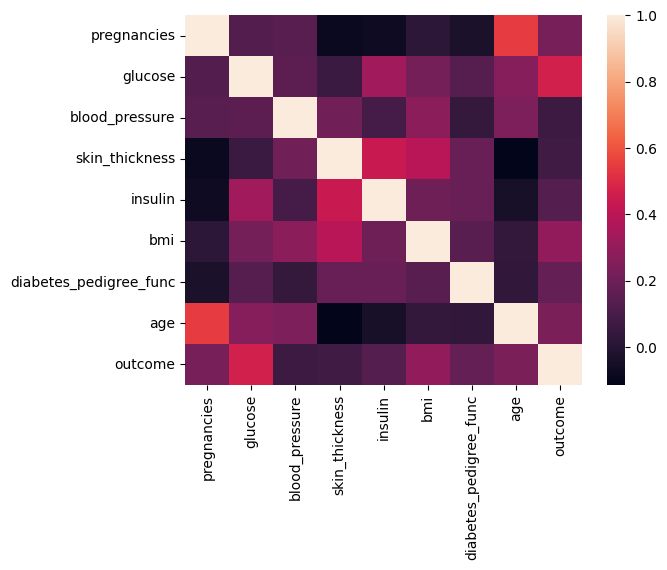

In [66]:
sns.heatmap(data.corr())

In [97]:
X_train_binarized_cleaned

,pregnancies_ge_1,pregnancies_le_1,pregnancies_ge_3,pregnancies_le_3,pregnancies_ge_7,pregnancies_le_7,pregnancies_ge_9,pregnancies_le_9,glucose_ge_79,glucose_le_79,...,age_ge_24,age_le_24,age_ge_29,age_le_29,age_ge_40,age_le_40,age_ge_50,age_le_50,age_ge_60,age_le_60
357,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
73,1,0,1,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
352,1,0,1,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
497,1,0,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
145,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
106,1,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
270,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,1
435,0,1,0,1,0,1,0,1,1,0,...,1,0,1,1,0,1,0,1,0,1
